# RandomForest classifier using Dask

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.externals import joblib

from utils.mnist_reader import load_mnist
X_main, y_main = load_mnist("data/fashion", kind="train")
X_main = X_main.astype(np.float32)
y_main = y_main.astype(np.float32)

X_test, y_test = load_mnist("data/fashion", kind="t10k")
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

print (X_main.shape, y_main.shape)
print (X_test.shape, y_test.shape)

/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


(60000, 784) (60000,)
(10000, 784) (10000,)


# Explore Data

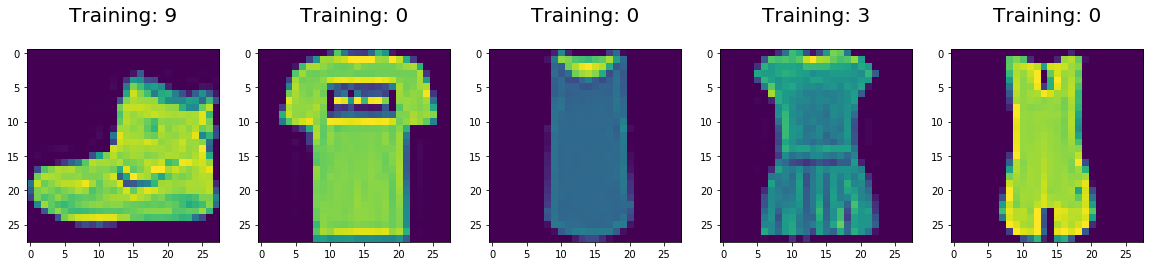

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_main[0:5], y_main[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap='viridis')
    plt.title('Training: %i\n' % label, fontsize = 20)

# Create Dask Client

In [3]:
from dask.distributed import Client
client = Client('dask-scheduler:8786')  # connect to cluster

In [ ]:
client

# Convert data to dask arrays

In [5]:
import dask.array as da
X_main = da.from_array(X_main)
y_main = da.from_array(y_main)

# Train

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

with joblib.parallel_backend('dask'):
    rfc.fit(X_main, y_main)

In [8]:
RandomForestClassifier?


Init signature:
RandomForestClassifier(
    n_estimators='warn',
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

    .. v

distributed.utils - ERROR - Timeout
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/distributed/utils.py", line 713, in log_errors
    yield
  File "/opt/conda/lib/python3.7/site-packages/distributed/client.py", line 980, in _reconnect
    yield self._ensure_connected(timeout=timeout)
  File "/opt/conda/lib/python3.7/site-packages/tornado/gen.py", line 729, in run
    value = future.result()
  File "/opt/conda/lib/python3.7/site-packages/tornado/gen.py", line 736, in run
    yielded = self.gen.throw(*exc_info)  # type: ignore
  File "/opt/conda/lib/python3.7/site-packages/distributed/client.py", line 1015, in _ensure_connected
    timedelta(seconds=timeout), self._update_scheduler_info()
  File "/opt/conda/lib/python3.7/site-packages/tornado/gen.py", line 729, in run
    value = future.result()
tornado.util.TimeoutError: Timeout
distributed.utils - ERROR - Timeout
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/distrib

In [ ]:
rfc

# Validate

In [ ]:
plt.imshow(np.reshape(X_test[0:1], (28,28)), cmap='viridis')

In [ ]:
y_test[0:1]

In [ ]:
rfc.predict(X_test[0:1])

In [ ]:
client.close()